In [1]:
# Let printing work the same in Python 2 and 3
from __future__ import print_function
# Turning on notebook plots -- just for use in jupyter notebooks.
import matplotlib
matplotlib.use('nbagg')
import numpy as np
import matplotlib.pyplot as plt

# How to speak "MPL"
In the previous parts, you learned how Matplotlib organizes plot-making by figures and axes. We broke down the components of a basic figure and learned how to create them. You also learned how to add one or more axes to a figure, and how to tie them together. You even learned how to change some of the basic appearances of the axes. Finally, we went over some of the many plotting methods that Matplotlib has to draw on those axes. With all that knowledge, you should be off making great and wonderful figures.

Why are you still here?

"We don't know how to control our plots and figures!" says some random voice in the back of the room.

Of course! While the previous sections may have taught you some of the structure and syntax of Matplotlib, it did not describe much of the substance and vocabulary of the library. This section will go over many of the properties that are used throughout the library. Note that while many of the examples in this section may show one way of setting a particular property, that property may be applicible elsewhere in completely different context. This is the "language" of Matplotlib.

# Colors
This is, perhaps, the most important piece of vocabulary in Matplotlib. Given that Matplotlib is a plotting library, colors are associated with everything that is plotted in your figures. Matplotlib supports a [very robust language](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) for specifying colors that should be familiar to a wide variety of users.

### Colornames
First, colors can be given as strings. For very basic colors, you can even get away with just a single letter:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

Other colornames that are allowed are the HTML/CSS colornames such as "burlywood" and "chartreuse". See the [full list](https://www.w3schools.com/Colors/colors_names.asp) of the 140 color names. 

Matplotlib supports the [xkcd color names](https://xkcd.com/color/rgb/) prefxed by `'xkcd:'`.

Matplotlib also understands  `{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'}` which are the Tableau Colors from the ‘T10’ categorical palette (and the default color cycle);

### Hex values
Colors can also be specified by supplying a HTML/CSS hex string, such as `'#0000FF'` for blue. Support for an optional alpha channel was added for v2.0.

### 256 Shades of Gray
A gray level can be given instead of a color by passing a string representation of a number between 0 and 1, inclusive. `'0.0'` is black, while `'1.0'` is white. `'0.75'` would be a light shade of gray.

### Cycle references
With the advent of fancier color cycles coming from the many available styles, users needed a way to reference those colors in the style without explicitly knowing what they are. So, in v2.0, the ability to reference the first 10 iterations of the color cycle was added. Whereever one could specify a color, you can supply a 2 character string of 'C#'. So, 'C0' would be the first color, 'C1' would be the second, and so on and so forth up to 'C9'.

### RGB[A] tuples
You may come upon instances where the previous ways of specifying colors do not work. When all else fails, the universal language of colors for matplotlib is the RGB[A] tuple. This is the "Red", "Green", "Blue", and sometimes "Alpha" tuple of floats in the range of [0, 1]. One means full saturation of that channel, so a red RGBA tuple would be `(1.0, 0.0, 0.0, 1.0)`, whereas a partly transparent green RGBA tuple would be `(0.0, 1.0, 0.0, 0.75)`.  The documentation will usually specify whether it accepts RGB or RGBA tuples. Sometimes, a list of tuples would be required for multiple colors, and you can even supply a Nx3 or Nx4 numpy array in such cases.

In functions such as `plot()` and `scatter()`, while it may appear that they can take a color specification, what they really need is a "format specification", which includes color as part of the format. Unfortunately, such specifications are string only and so RGB[A] tuples are not supported for such arguments (but you can still pass an RGB[A] tuple for a "color" argument).

Oftentimes there is a separate argument for "alpha" where-ever you can specify a color. The value for "alpha" will usually take precedence over the alpha value in the RGBA tuple. There is no easy way around this inconsistency.



## Exercise 3.1
Try out some different string representations of colors (you can't do RGB[A] tuples here).

In [2]:
%load exercises/3.1-colors.py


ValueError: 'exercises/3.1-colors.py' was not found in history, as a file, url, nor in the user namespace.

In [ ]:
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t, t, t**2, t, t**3)
plt.show()

# Markers
[Markers](http://matplotlib.org/api/markers_api.html) are commonly used in [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) plots, but also show up elsewhere. There is a wide set of markers available, and custom markers can even be specified.

marker     |  description  ||marker    |  description  ||marker    |  description  ||marker    |  description  
:----------|:--------------||:---------|:--------------||:---------|:--------------||:---------|:--------------
"."        |  point        ||"+"       |  plus         ||","       |  pixel        ||"x"       |  cross
"o"        |  circle       ||"D"       |  diamond      ||"d"       |  thin_diamond ||          |
"8"        |  octagon      ||"s"       |  square       ||"p"       |  pentagon     ||"\*"      |  star
"&#124;"   |  vertical line||"\_"      | horizontal line ||"h"     |  hexagon1     ||"H"       |  hexagon2
0          |  tickleft     ||4         |  caretleft    ||"<"       | triangle_left ||"3"       |  tri_left
1          |  tickright    ||5         |  caretright   ||">"       | triangle_right||"4"       |  tri_right
2          |  tickup       ||6         |  caretup      ||"^"       | triangle_up   ||"2"       |  tri_up
3          |  tickdown     ||7         |  caretdown    ||"v"       | triangle_down ||"1"       |  tri_down
"None"     |  nothing      ||`None`    |  default       ||" "       |  nothing      ||""        |  nothing

In [ ]:
xs, ys = np.mgrid[:4, 9:0:-1]
markers = [".", "+", ",", "x", "o", "D", "d", "", "8", "s", "p", "*", "|", "_", "h", "H", 0, 4, "<", "3",
           1, 5, ">", "4", 2, 6, "^", "2", 3, 7, "v", "1", "None", None, " ", ""]
descripts = ["point", "plus", "pixel", "cross", "circle", "diamond", "thin diamond", "",
             "octagon", "square", "pentagon", "star", "vertical bar", "horizontal bar", "hexagon 1", "hexagon 2",
             "tick left", "caret left", "triangle left", "tri left", "tick right", "caret right", "triangle right", "tri right",
             "tick up", "caret up", "triangle up", "tri up", "tick down", "caret down", "triangle down", "tri down",
             "Nothing", "default", "Nothing", "Nothing"]
fig, ax = plt.subplots(1, 1, figsize=(7.5, 4))
for x, y, m, d in zip(xs.T.flat, ys.T.flat, markers, descripts):
    ax.scatter(x, y, marker=m, s=100)
    ax.text(x + 0.1, y - 0.1, d, size=14)
ax.set_axis_off()
plt.show()

## Exercise 3.2
Try out some different markers and colors

In [ ]:
%load exercises/3.2-markers.py

In [ ]:
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t, , t, t**2, , t, t**3, )
plt.show()

# Linestyles
Line styles are about as commonly used as colors. There are a few predefined linestyles available to use. Note that there are some advanced techniques to specify some custom line styles. [Here](http://matplotlib.org/1.3.0/examples/lines_bars_and_markers/line_demo_dash_control.html) is an example of a custom dash pattern.

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

Also, don't mix up ".-" (line with dot markers) and "-." (dash-dot line) when using the ``plot`` function!

<IPython.core.display.Javascript object>


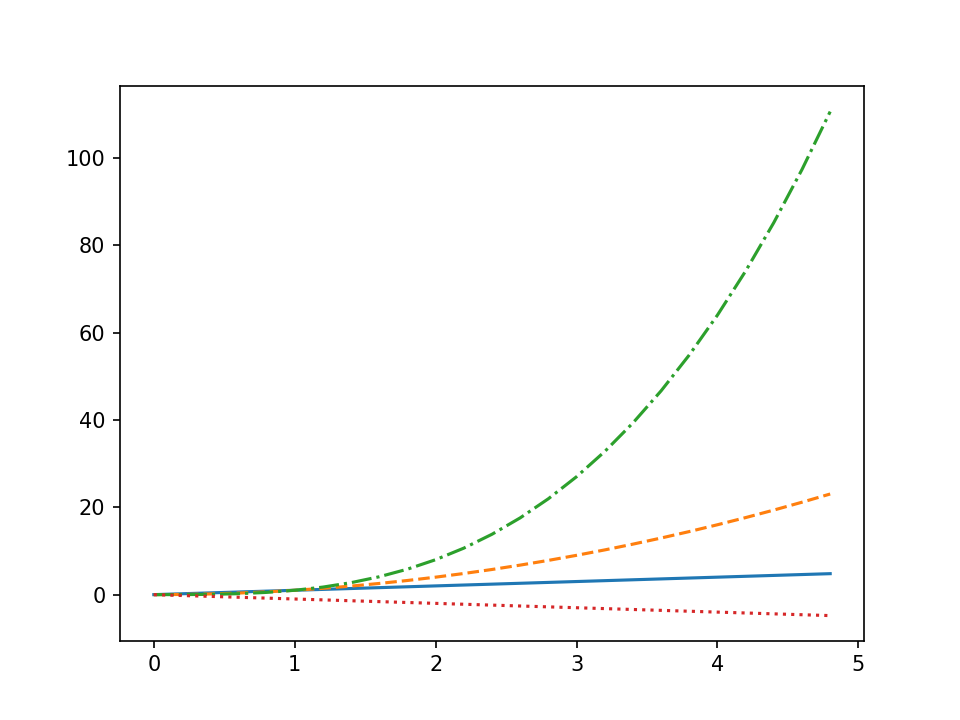

In [5]:
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t, '-', t, t**2, '--', t, t**3, '-.', t, -t, ':')
plt.show()

It is a bit confusing, but the line styles mentioned above are only valid for lines. Whenever you are dealing with the linestyles of the edges of "Patch" objects, you will need to use words instead of the symbols. So "solid" instead of "-", and "dashdot" instead of "-.". This issue will be fixed for the v2.1 release and allow these specifications to be used interchangably.

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.bar([1, 2, 3, 4], [10, 20, 15, 13], ls='dashed', ec='r', lw=5)
plt.show()

# Plot attributes
With just about any plot you can make, there are many attributes that can be modified to make the lines and markers suit your needs. Note that for many plotting functions, Matplotlib will cycle the colors for each dataset you plot. However, you are free to explicitly state which colors you want used for which plots. For [`plt.plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot), you can mix the specification for the colors, linestyles, and markers in a single string.

In [ ]:
t = np.arange(0., 5., 0.2)
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

| Property               | Value Type                                      
|------------------------|-------------------------------------------------
|alpha                   | float                                           
|color or c              | any matplotlib color                            
|dash_capstyle           | ['butt', 'round' 'projecting']               
|dash_joinstyle          | ['miter' 'round' 'bevel']
|dashes                  | sequence of on/off ink in points                
|drawstyle               | [ ‘default’ ‘steps’ ‘steps-pre’
|                        |   ‘steps-mid’ ‘steps-post’ ]
|linestyle or ls         | [ '-' '--' '-.' ':' 'None' ' ' ''] 
|                        | and any drawstyle in combination with a         
|                        | linestyle, e.g. 'steps--'.                      
|linewidth or lw         | float value in points                           
|marker                  | [ 0 1 2 3 4 5 6 7 'o' 'd' 'D' 'h' 'H'
|                        |  '' 'None' ' ' `None` '8' 'p' ','
|                        |  '+' 'x' '.' 's' '\*' '\_' '&#124;'
|                        |  '1' '2' '3' '4' 'v' '<' '>' '^' ]
|markeredgecolor or mec  | any matplotlib color
|markeredgewidth or mew  | float value in points
|markerfacecolor or mfc  | any matplotlib color
|markersize or ms        | float
|solid_capstyle          | ['butt' 'round' 'projecting']
|solid_joinstyle         | ['miter' 'round' 'bevel']
|visible                 | [`True` `False`]
|zorder                  | any number

## Exercise 3.3
Make a plot that has a dotted red line, with large yellow diamond markers that have a green edge

In [ ]:
%load exercises/3.3-properties.py

In [ ]:
t = np.arange(0.0, 5.0, 0.1)
a = np.exp(-t) * np.cos(2*np.pi*t)
plt.plot(t, a, )
plt.show()

# Colormaps
Another very important property of many figures is the colormap. The job of a colormap is to relate a scalar value to a color. In addition to the regular portion of the colormap, an "over", "under" and "bad" color can be optionally defined as well. NaNs will trigger the "bad" part of the colormap.

As we all know, we create figures in order to convey information visually to our readers. There is much care and consideration that have gone into the design of these colormaps. Your choice in which colormap to use depends on what you are displaying. In mpl, the "jet" colormap has historically been used by default, but it will often not be the colormap you would want to use. Much discussion has taken place on the mailing lists with regards to what colormap should be default. The v2.0 release of Matplotlib adopted a new default colormap, 'viridis', along with some other stylistic changes to the defaults.

I want to acknowedge Nicolas Rougier and Tony Yu for putting significant effort in educating users in proper colormap selections. Furthermore, thanks goes to Nathaniel Smith and Stéfan van der Walt for developing the new perceptually uniform colormaps such as viridis. [Here is the talk](https://www.youtube.com/watch?v=xAoljeRJ3lU) they gave at SciPy 2015 that does an excelent job explaining colormaps.

Here is the full gallery of all the pre-defined colormaps, organized by the types of data they are usually used for.

In [ ]:
# %load http://matplotlib.org/mpl_examples/color/colormaps_reference.py
"""
==================
Colormap reference
==================

Reference for colormaps included with Matplotlib.

This reference example shows all colormaps included with Matplotlib. Note that
any colormap listed here can be reversed by appending "_r" (e.g., "pink_r").
These colormaps are divided into the following categories:

Sequential:
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.

Diverging:
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).

Qualitative:
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::

        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

    gives a list of RGB colors that are good for plotting a series of lines on
    a dark background.

Miscellaneous:
    Colormaps that don't fit into the categories above.

"""
import numpy as np
import matplotlib.pyplot as plt


# Have colormaps separated into categories:
# http://matplotlib.org/examples/color/colormaps_reference.html
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()


When colormaps are created in mpl, they get "registered" with a name. This allows one to specify a colormap to use by name.

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
z = np.random.random((10, 10))
ax1.imshow(z, interpolation='none', cmap='gray')
ax2.imshow(z, interpolation='none', cmap='coolwarm')
plt.show()

# Mathtext
Oftentimes, you just simply need that superscript or some other math text in your labels. Matplotlib provides a very easy way to do this for those familiar with LaTeX. Any text that is surrounded by dollar signs will be treated as "[mathtext](http://matplotlib.org/users/mathtext.html#mathtext-tutorial)". Do note that because backslashes are prevelent in LaTeX, it is often a good idea to prepend an `r` to your string literal so that Python will not treat the backslashes as escape characters.

In [ ]:
plt.scatter([1, 2, 3, 4], [4, 3, 2, 1])
plt.title(r'$\sigma_i=15$', fontsize=20)
plt.show()

# Hatches
A Patch object can have a hatching defined for it.

* /   - diagonal hatching
* \   - back diagonal
* |   - vertical
* \-   - horizontal
* \+   - crossed
* x   - crossed diagonal
* o   - small circle
* O   - large circle (upper-case 'o')
* .   - dots
* \*   - stars
     
Letters can be combined, in which case all the specified
hatchings are done.  Repeating a character increases the
density of hatching of that pattern.

# Property Cycles
In case you haven't noticed, when you do multiple plot calls in the same axes -- and not specify any colors -- the color for each plot is different! The default style in Matplotlib will cycle through a list of colors if you don't specify any. This feature has been in Matplotlib for a long time and it is similar to Matlab behavior.

In v1.5, this feature was extended so that one can cycle through other properties besides just color. Now, you can cycle linestyles, markers, hatch styles -- just about any property that can be specified is now possible to be cycled.

This feature is still being refined, and there has been significant improvements in its usability since v1.5, but here is a basic example that will work for v2.0 or greater (for v1.5, you may need to have this cycler expression quoted).

In [ ]:
import matplotlib as mpl
from matplotlib.rcsetup import cycler
mpl.rc('axes', prop_cycle=cycler('color', 'rgc') +
                          cycler('lw', [1, 4, 6]) +
                          cycler('linestyle', ['-', '-.', ':']))
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t)
plt.plot(t, t**2)
plt.plot(t, t**3)
plt.show()

## Ugly tie contest!

In [ ]:
mpl.rc('axes', prop_cycle=cycler('color', ['r', 'orange', 'c', 'y']) +
                          cycler('hatch', ['x', 'xx-', '+O.', '*']))
x = np.array([0.4, 0.2, 0.5, 0.8, 0.6])
y = [0, -5, -6, -5, 0]
plt.fill(x+1, y)
plt.fill(x+2, y)
plt.fill(x+3, y)
plt.fill(x+4, y)
plt.show()

# Transforms
The topic of transforms in Matplotlib, that is the ability to map the coordinates specified by your data to the coordinates of your figure, is very advanced and will not be covered in this tutorial. For those who are interested in learning about them, see the [transformation tutorial](http://matplotlib.org/users/transforms_tutorial.html). For those who are really daring, there are the developer guides to [transforms](http://matplotlib.org/devel/transformations.html) and [scales](http://matplotlib.org/devel/add_new_projection.html). While most users will never, ever need to understand Matplotlib transforms to the level described in those links, it is important to be aware of them, and their critical role in figure-making.

In a figure, there are four coordinate systems: *display*, *figure*, *axes*, and *data*. Transforms are used to convert coordinates in one system into another system for various uses. This is how Matplotlib knows exactly where to place the ticks and ticklabels, even when you change the axis limits. The ticker says that the tick and label "1.5", for example, are to go at data x-coordinate 1.5. The transform says that location is at 0.4 in axes x-coordinate space. Meanwhile, the xlabel of "Distance" is placed at axes x-coordinate space of 0.5 (half-way). Meanwhile, a legend might be placed at a location relative to the figure coordinates.

Furthermore, the transform system is what is used to allow various scales to work, such as log scales. The transform system is what is used to make the polar plots work seamlessly. Whether you realize it or not, you use the transforms system in Matplotlib all the time. Everything drawn in Matplotlib has a transform associated with it. Most of the time, you will never notice this, and will happily operate within the *data* coordinate system. But when you want to do some more advanced plots, with some eye-catching visual tricks, the transform system will be there for you.

# Managing the unmanagable -- Introducing matplotlibrc
Matplotlib's greatest strength is its ability to give you complete control over every single aspect of your plots and figures. Matplotlib's second greatest strength is its ability to take as much control over as much of your plots and figures as you want. You, as the user, would never consider to use Matplotlib if you had to specify all of these things for every single plot. Most of the time, the defaults are exactly what you want them to be.

Matplotlib uses the matplotlibrc configuration file to define the plethora of defaults found in the library. You can control the defaults of almost every property in Matplotlib: figure size and dpi, line width, color and style, axes, axis and grid properties, text and font properties and so on. Just modify your rc file and re-run your scripts to produce your improved figures.

To display where the currently active matplotlibrc file was loaded from, one can do the following:

In [ ]:
import matplotlib
print(matplotlib.matplotlib_fname())

You can also change the rc settings during runtime within a python script or interactively from the python shell. All of the rc settings are stored in a dictionary-like variable called [`matplotlib.rcParams`](http://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.matplotlib.rcParams), which is global to the matplotlib package. `rcParams` can be modified directly. Newer versions of matplotlib can use [`rc()`](http://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rc), for example:

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcdefaults()  # for when re-running this cell

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot([1, 2, 3, 4])

mpl.rc('lines', linewidth=2, linestyle='-.')
# Equivalent older, but still valid syntax
#mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.linestyle'] = '-.'
ax2.plot([1, 2, 3, 4])
plt.show()

To learn more, please see this guide on [customizing matplotlib](http://matplotlib.org/users/customizing.html).